In [13]:
%matplotlib inline

import numpy as np
import pandas as pd
import sklearn.svm
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt

Dataset 1 can be separated by a linear decision boundry.

First, merge data from separate training examples into a single dataframe: 

In [14]:
mat = sio.loadmat('./ex6data1.mat')
print(mat.keys())
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data['y'] = mat.get('y')

data.head(5)
data.tail(5)

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
46,2.091000,1.6177,0
47,2.540300,2.8867,0
48,0.904400,3.0198,0
49,0.766150,2.5899,0
50,0.086405,4.1045,1


# Visualize Dataset 1

Text(0,0.5,'X2')

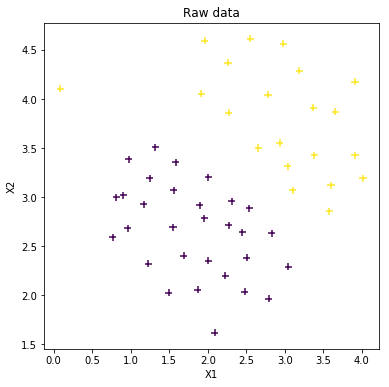

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['y'], marker = '+')
ax.set_title('Raw data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# Explore C, an SVM parameter for misclassification penalty
## $C=1$
http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [16]:
svc1 = sklearn.svm.LinearSVC(C=1, loss='hinge')
svc1.fit(data[['X1', 'X2']], data['y'])
svc1.score(data[['X1', 'X2']], data['y'])

0.98039215686274506

In [17]:
data['SVM C=1 Confidence'] = svc1.decision_function(data[['X1', 'X2']])

Text(0.5,1,'SVM (C=1) Decision Confidence')

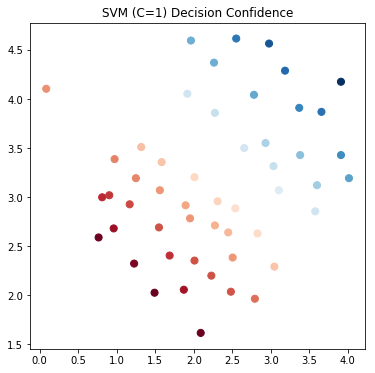

In [18]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM C=1 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=1) Decision Confidence')

## $C=100$
As $C$ increases, classification variance increases as well, leading to overfitting.

In [19]:
svc100 = sklearn.svm.LinearSVC(C=100, loss='hinge')
svc100.fit(data[['X1', 'X2']], data['y'])
svc100.score(data[['X1', 'X2']], data['y'])

0.94117647058823528

In [20]:
data['SVM C=100 Confidence'] = svc100.decision_function(data[['X1', 'X2']])

Text(0.5,1,'SVM (C=100) Decision Confidence')

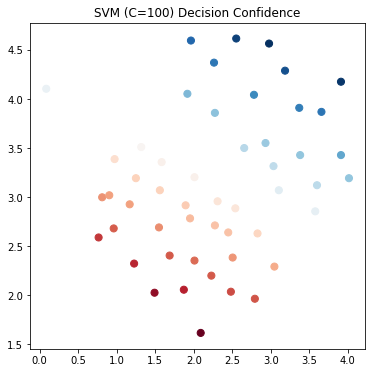

In [21]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM C=100 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=100) Decision Confidence')

In [22]:
data.head()

,X1,X2,y,SVM C=1 Confidence,SVM C=100 Confidence
0,1.9643,4.5957,1,0.797609,4.875806
1,2.2753,3.8589,1,0.380335,2.845658
2,2.9781,4.5651,1,1.372595,6.002200
3,2.9320,3.5519,1,0.518415,2.637385
4,3.5772,2.8560,1,0.332299,1.145076
